In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle as pkl
import seaborn as sns


In [35]:
# Plots accuracy, ood and confusion for a given dataset
colors = ["#244C5B", "#EBB57C", "#C2504C", "#439888"]

def plot(dfs, distances, max_points):
    fig, ax = plt.subplots(1, 3, figsize=(20, 5))
    for (df, distance, color) in zip(dfs, distances, colors):
        print(color)

        ax[0].plot(df['accuracy'].values[:max_points], label=distance, alpha = 0.8, color = color)
        ax[0].set_title('accuracy ↑')
        #for x in np.arange(0, max_points, 50):
        #   ax[0].axvline(x, color = "firebrick", ls = "--", linewidth = "0.5")
        ax[0].set_xlim(0)
        #ax[0].set_yscale("log")
        ax[0].grid(True)
        #ax[0].set_ylim(10e-2, 1.1)
        ax[0].legend()
        ax[0].tick_params( labelright=True)

        ax[1].plot(df['ood'].values[:max_points], label=distance, alpha = 0.8, color = color)
        ax[1].set_title('ood ↑')
        ax[1].set_ylim(0, 1.1)
        ax[1].set_xlim(0)
        ax[1].legend()
        ax[1].grid(True)
        ax[1].tick_params( labelright=True)

        ax[2].plot(df['confusion'].values[:max_points], label=distance, alpha = 0.8, color = color )
        ax[2].set_title('confusion ↓')
        ax[2].set_xlim(0)
        ax[2].set_ylim(0, 1.1)
        ax[2].set_yscale("log")
        ax[2].legend()
        ax[2].grid(True)
        ax[2].tick_params( labelright=True)



# Ordered

#244C5B
#EBB57C
#C2504C
#439888


/tmp/ipykernel_3109946/2607210567.py:31: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[2].set_ylim(0, 1.1)


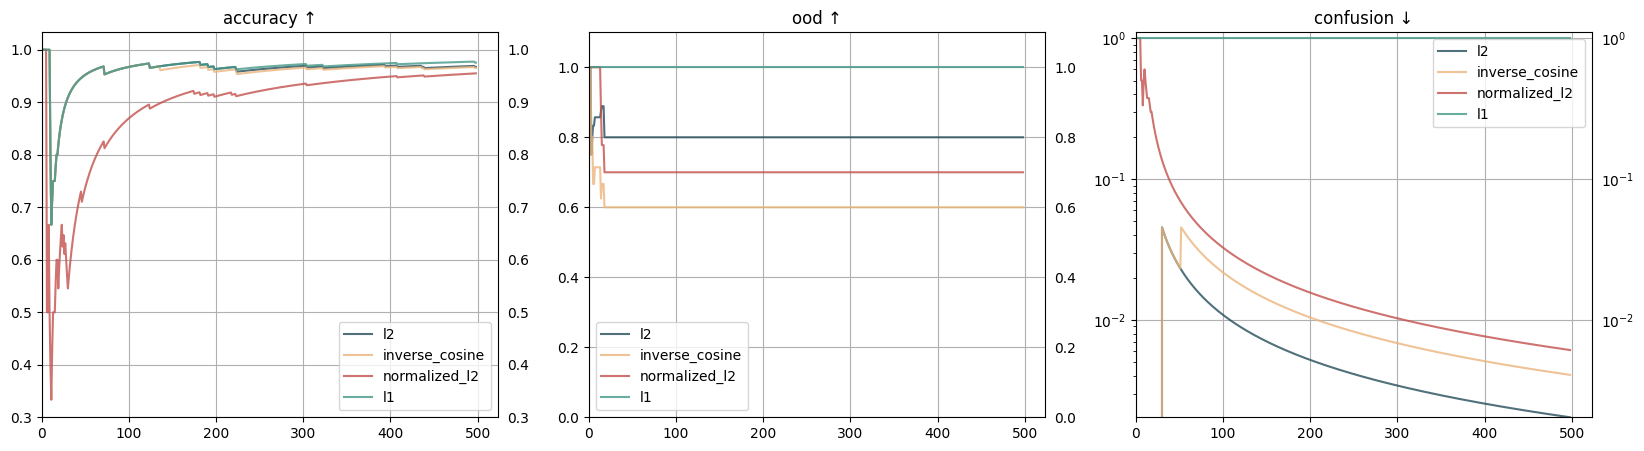

In [36]:
DATASET = 'CORE50'
MODEL = 'CLIP'
DISTANCE_TYPEs = ['l2', "inverse_cosine", "normalized_l2", "l1"]
PROCESSING_FRAMES = 30
THRESHOLDs = [6.7, 1.25, 1.8, 2.7] 
MAX_POINTS = 500

dir_paths = [f"results/{DATASET}_{DISTANCE_TYPE}_{PROCESSING_FRAMES}_{MODEL}/metrics_{format(THRESHOLD, '.2f')}.csv" for (DISTANCE_TYPE, THRESHOLD) in zip(DISTANCE_TYPEs, THRESHOLDs)]
dfs = [pd.read_csv(dir_path) for dir_path in dir_paths]
plot(dfs, DISTANCE_TYPEs, MAX_POINTS)

# Shuffled

/tmp/ipykernel_3109946/828139836.py:30: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[2].set_ylim(0, 1.1)


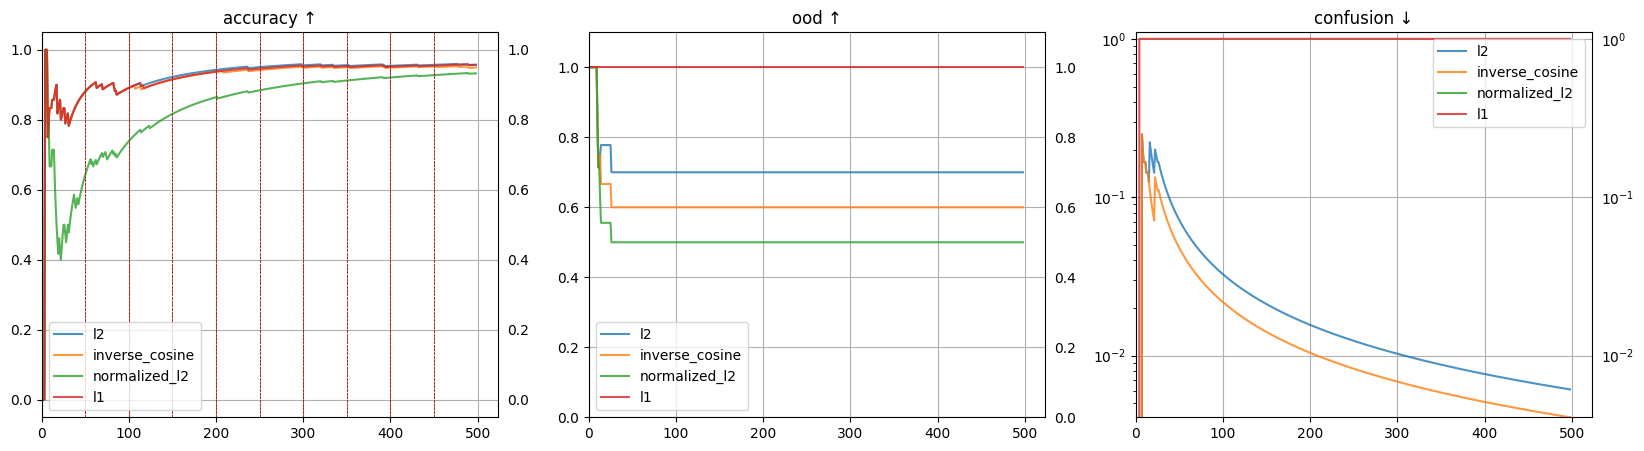

In [26]:
DATASET = 'CORE50'
MODEL = 'CLIP'
DISTANCE_TYPEs = ['l2', "inverse_cosine", "normalized_l2", "l1"]
PROCESSING_FRAMES = 30
THRESHOLDs = [6.7, 1.25, 1.8, 2.7] 
MAX_POINTS = 500

dir_paths = [f"results/{DATASET}_{DISTANCE_TYPE}_{PROCESSING_FRAMES}_{MODEL}_shuffled/metrics_{format(THRESHOLD, '.2f')}.csv" for (DISTANCE_TYPE, THRESHOLD) in zip(DISTANCE_TYPEs, THRESHOLDs)]
dfs = [pd.read_csv(dir_path) for dir_path in dir_paths]
plot(dfs, DISTANCE_TYPEs, MAX_POINTS)

# Accuracy vs Human interaction

([<matplotlib.axis.XTick at 0x7f866867c040>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90'),
  Text(100, 0, '100')])

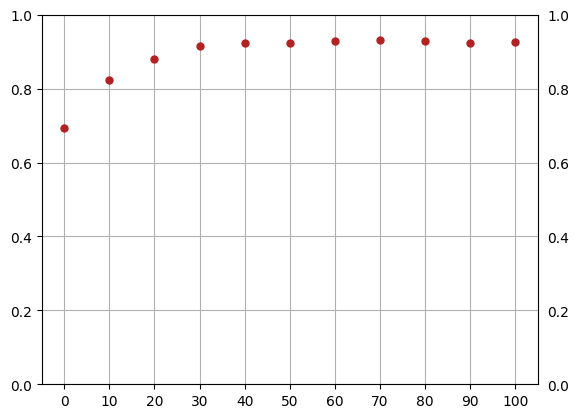

In [27]:
import pickle as pkl
import matplotlib.pyplot as plt
DATASET = 'CORE50'
MODEL = 'CLIP'
DISTANCE_TYPE = 'l2'
PROCESSING_FRAMES = 1
THRESHOLD = 6.7
MAX_POINTS = 500
accuracies = []
probabilities = [i*10 for i in range(11)]
for p in probabilities:
    path = f"results/{DATASET}_{DISTANCE_TYPE}_{PROCESSING_FRAMES}_{MODEL}_shuffled_p{p}/matrix_t6.70.pkl"
    with open(path, "rb") as f:
        m = pkl.load(f)
        accuracies.append(m.accuracy())
plt.plot(probabilities, accuracies, marker = ".", ls = "", ms = 10, color = "firebrick")
plt.ylim((0,1))
plt.grid()
plt.tick_params( labelright=True)
plt.xticks(probabilities)

In [28]:
results/CORE50_l2_1_CLIP_shuffled_p60/matrix_t6.70.pkl

SyntaxError: invalid syntax (287105151.py, line 1)